In [13]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import math
import pandas as pd
from scipy.optimize import curve_fit
import scipy.optimize as opt
import xarray as xr
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [43]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA levels.nc' #1959 to 2021 JJAS monthly
f1 = netCDF4.Dataset(a)
g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]

ds = xr.open_dataset(h)


In [15]:
div=4

In [40]:
P1 = []
Qdiv1 = []
Pwat1 = []
u = []
v = []
for i in range(0,756,12):
	sum1 = 0
	sum2 = 0
	sum3 = 0
	for j in range(i+5, i+9): 
		v2 = f8['mtnswrf'][j, :, :]
		v3 = f8['mtnlwrf'][j, :, :]
		v4 = f8['mslhf'][j, :, :]
		v5 = f8['msshf'][j, :, :]
		v6 = f8['msnswrf'][j, :, :]
		v7 = f8['msnlwrf'][j, :, :]
		v8 = f8['mtpr'][j, :, :]
		v9 = f8['mer'][j, :, :]
		v10 = f8['tcwv'][j, :, :]
		sum1 = sum1 + v2+v3+v4+v5+v6+v7
		sum2 = sum2 + 86400*28.96*(v8+v9)
		sum3 = sum3 + v10
	x = np.multiply(v1, sum1)
	y = np.multiply(v1, sum2)
	z = np.multiply(v1, sum3)
	Qdiv1.append(np.average(x[np.nonzero(x)])/div)
	P1.append(np.average(y[np.nonzero(y)])/div)
	Pwat1.append(np.average(z[np.nonzero(z)])/div)

TGMS1 = []
rat1 = []
rec1 = []
for i in range(len(P1)):
	TGMS1.append(Qdiv1[i]/P1[i])
	rec1.append(1/Pwat1[i])
    
for i in range(0, 252, 4):
    sum4 = 0
    sum5 = 0
    for j in range(i, i+4):
        v11 = f1['u'][j, 30, :, :]
        v12 = f1['v'][j, 30, :, :]
        sum4 = sum4 + v11
        sum5 = sum5 + v12
    l = np.multiply(v1, sum4)
    m = np.multiply(v1, sum5)
    u.append(np.average(l[np.nonzero(l)])/div)
    v.append(np.average(m[np.nonzero(m)])/div)

X = np.linspace(1959, 2021, 63, dtype='int')

# choose the input and output variables
x1, y1 = rec1, TGMS1
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

popt1, _ = curve_fit(objective, x1, y1)
# summarize the parameter values
a1, b1, c1 = popt1

print('y = %.5f * x + %.5f * x^2 + %.5f' % (a1, b1, c1)) #ERA5


x_line = np.linspace(np.min(x1), np.max(x1), 100)
y_line1 = objective(x_line, a1, b1, c1)

y = -626.91576 * x + 16277.73488 * x^2 + 6.35612


Text(0.5, 1.0, 'JJAS average 1959-2021')

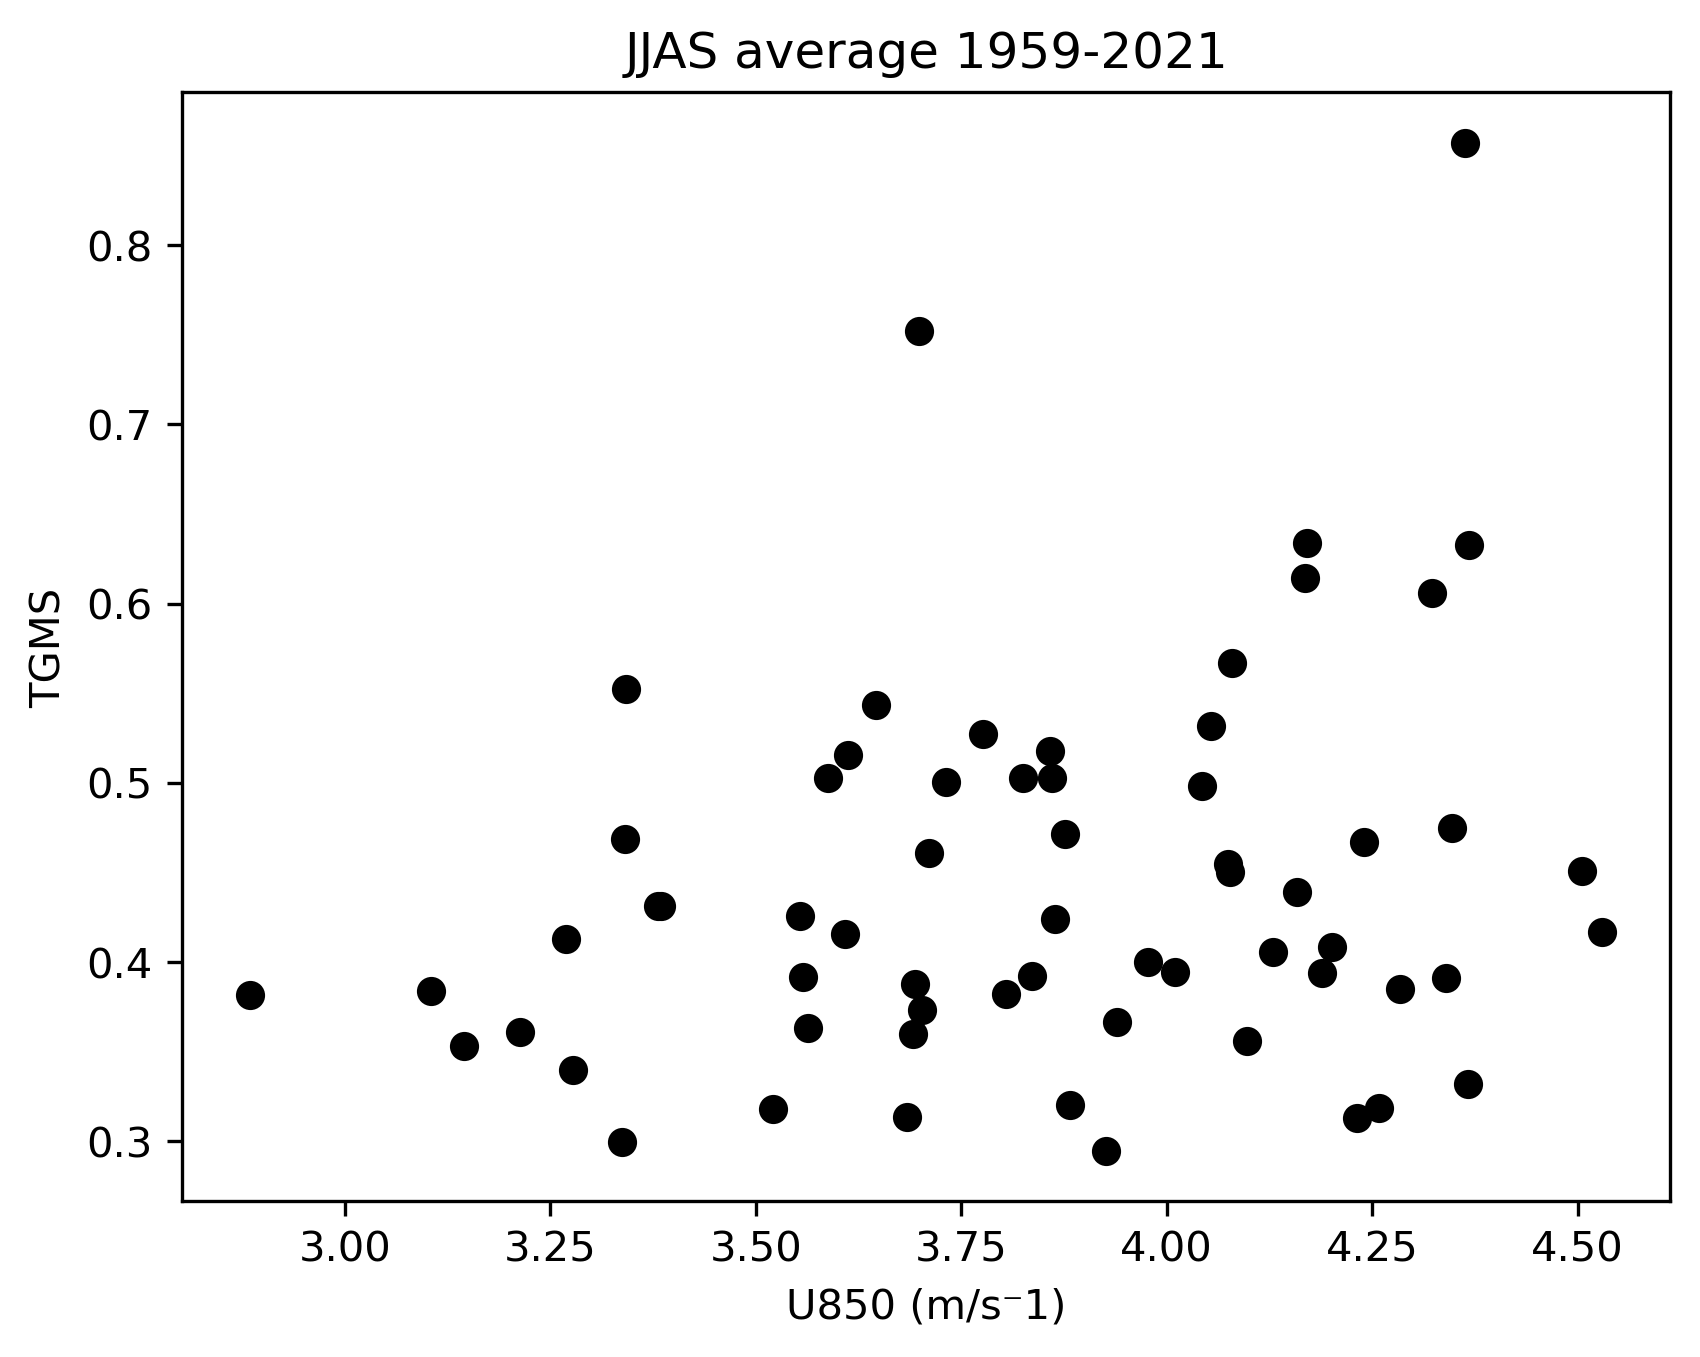

In [41]:
plt.scatter(u, TGMS1, c='black')
plt.ylabel('TGMS')
plt.xlabel('U850 (m/s\u207b1)')
plt.title('JJAS average 1959-2021')

Text(0.5, 1.0, 'JJAS average 1959-2021')

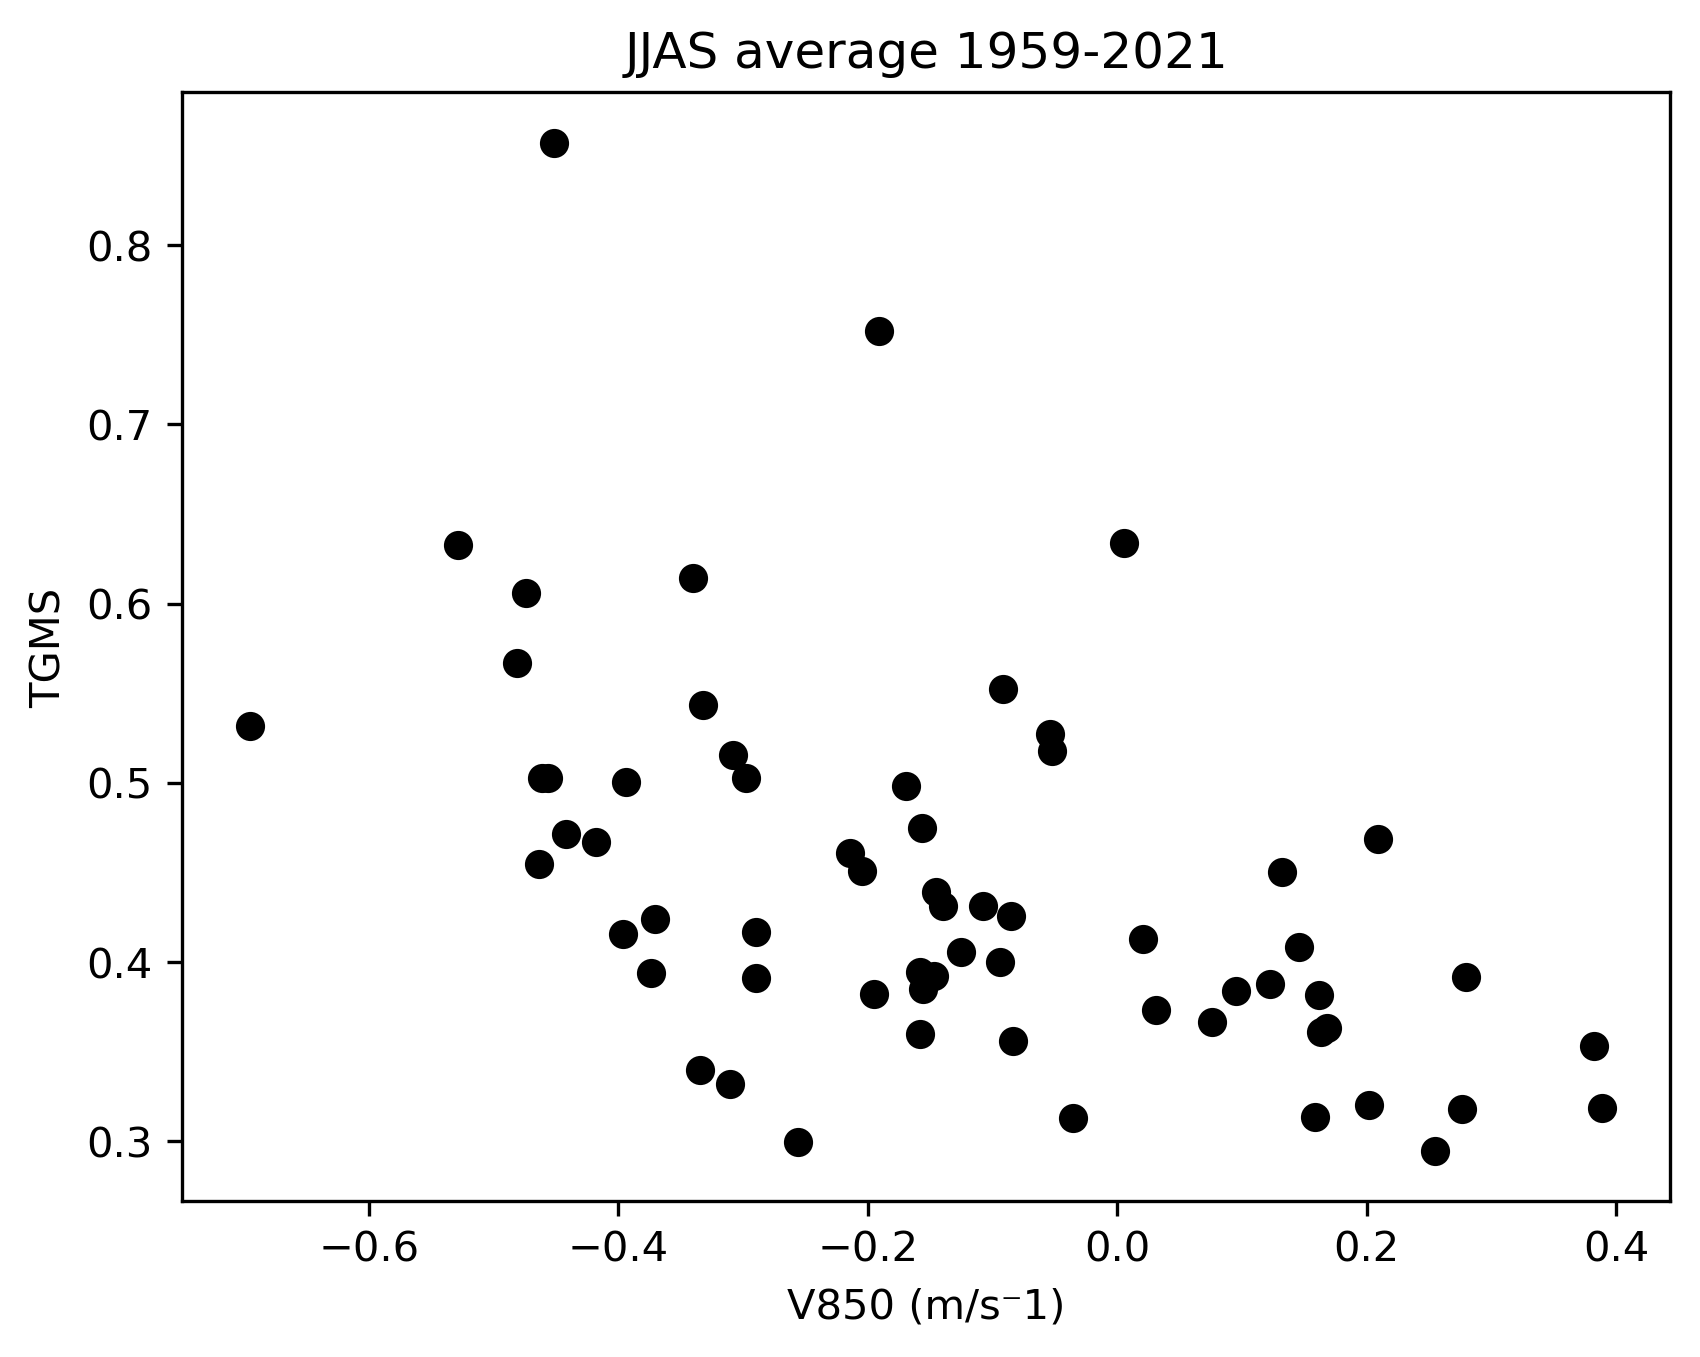

In [42]:
plt.scatter(v, TGMS1, c='black')
plt.ylabel('TGMS')
plt.xlabel('V850 (m/s\u207b1)')
plt.title('JJAS average 1959-2021')

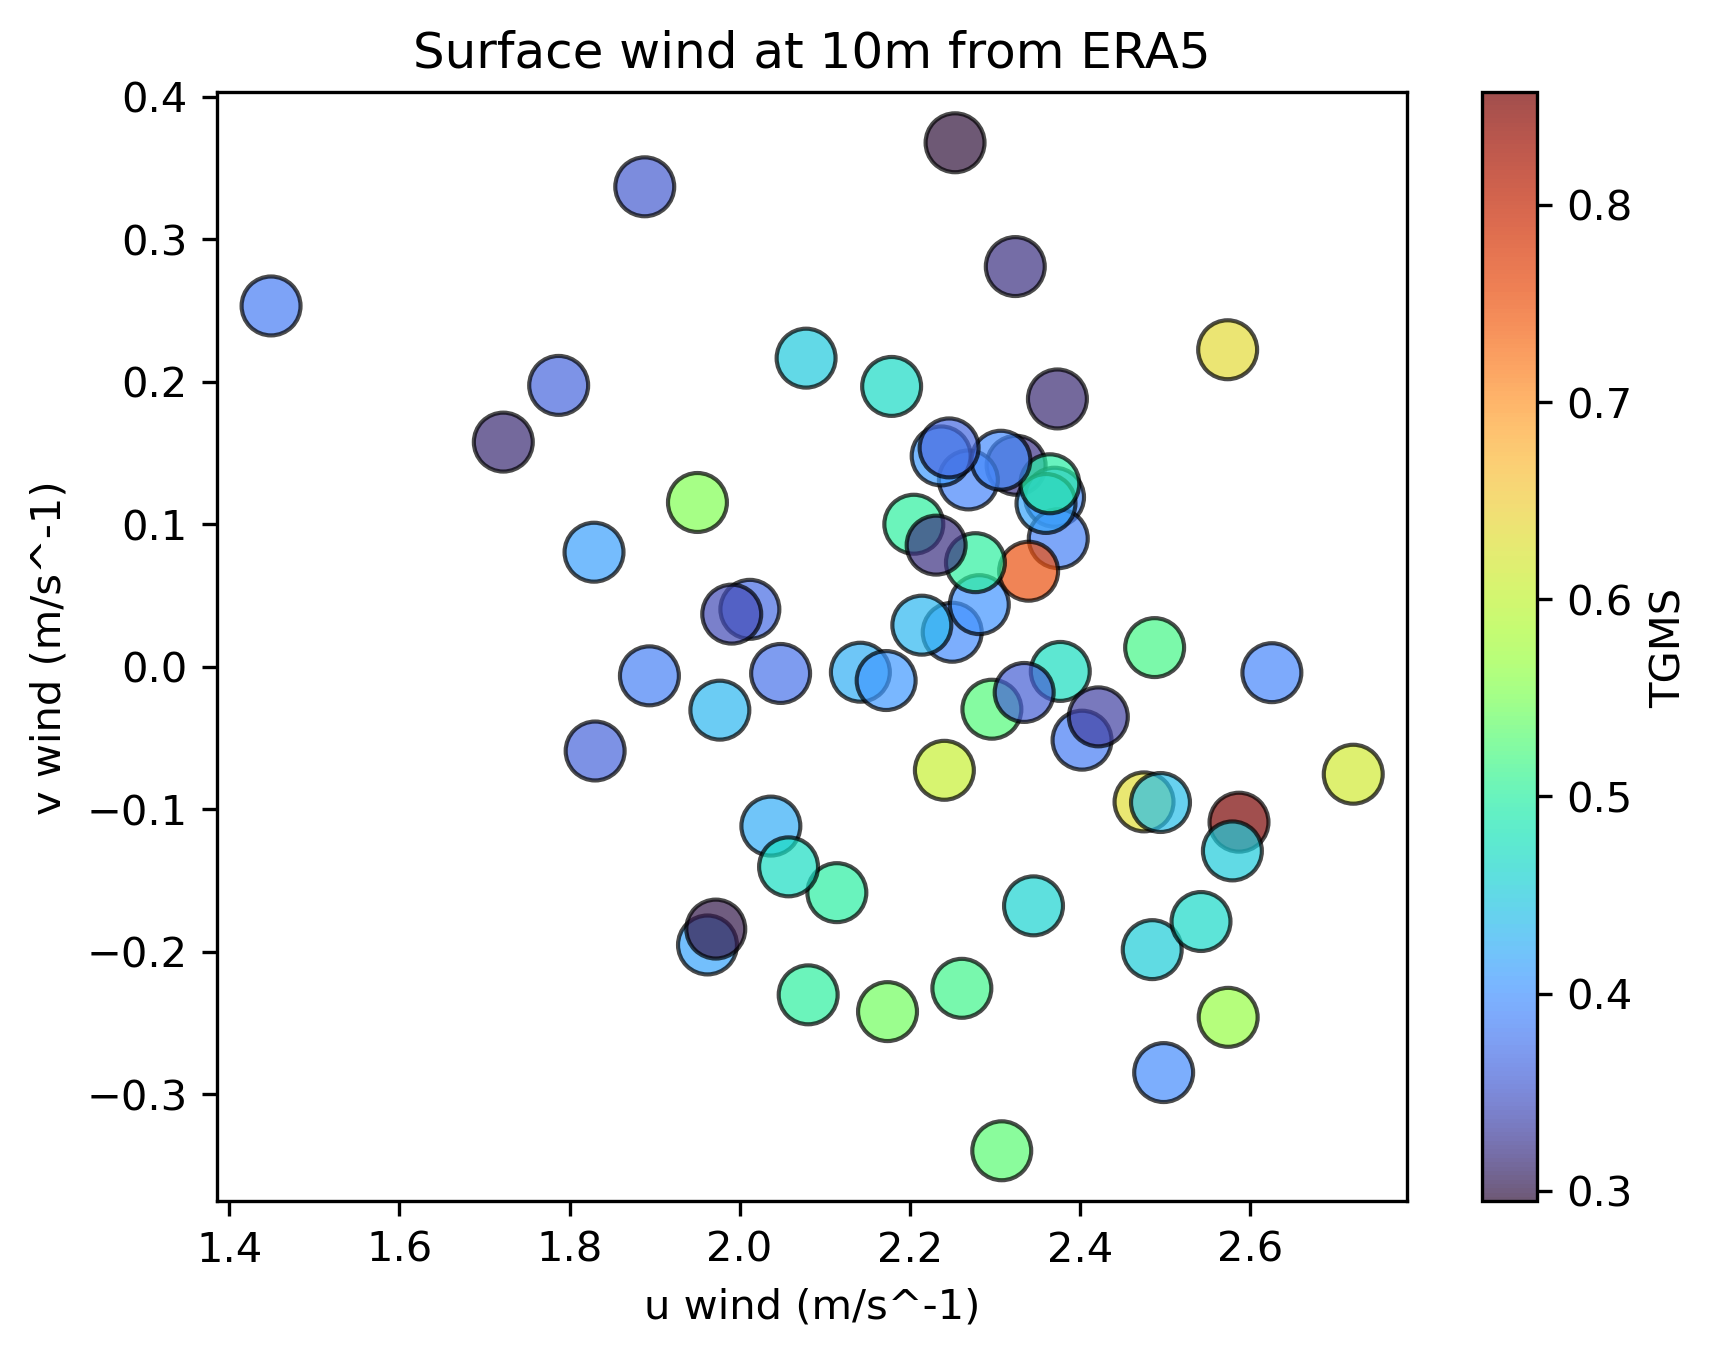

In [35]:
x,y = u,v
z = TGMS1

sc = plt.scatter(x,y,linewidths=1,alpha=.7,edgecolor='k',s = 200,c=z,cmap='turbo')
plt.xlabel('u wind (m/s^-1)')
plt.ylabel('v wind (m/s^-1)')
plt.title('Surface wind at 10m from ERA5')
clb = plt.colorbar(sc)
clb.ax.set_ylabel('TGMS')
plt.show()

Text(0.5, 1.0, 'JJAS average 1959-2021')

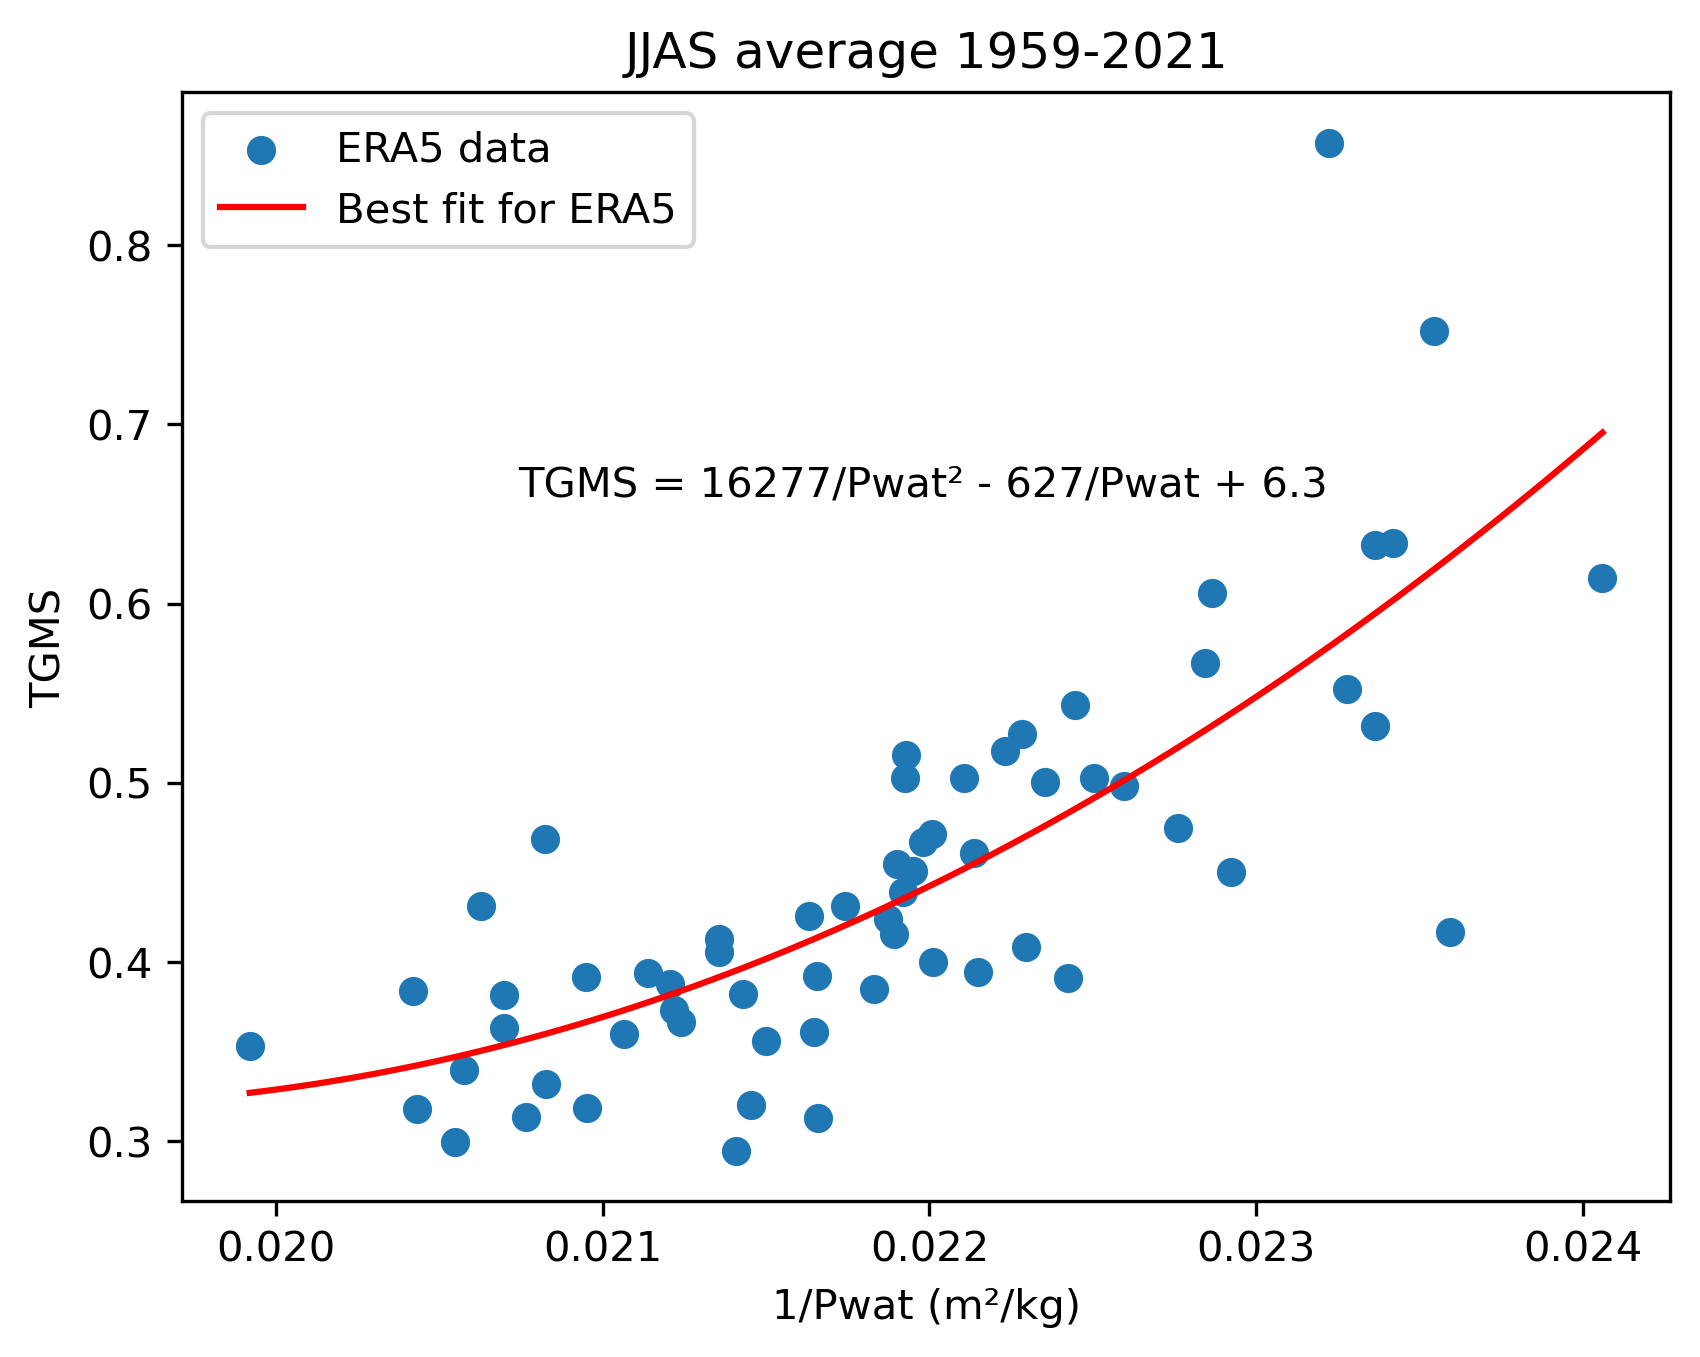

In [5]:
plt.scatter(x1, y1, label ='ERA5 data')
plt.plot(x_line, y_line1, color='red', label = "Best fit for ERA5")
plt.ylabel('TGMS')
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.figtext(0.3, 0.6, 'TGMS = 16277/Pwat\u00b2 - 627/Pwat + 6.3')
plt.legend()
plt.title('JJAS average 1959-2021')

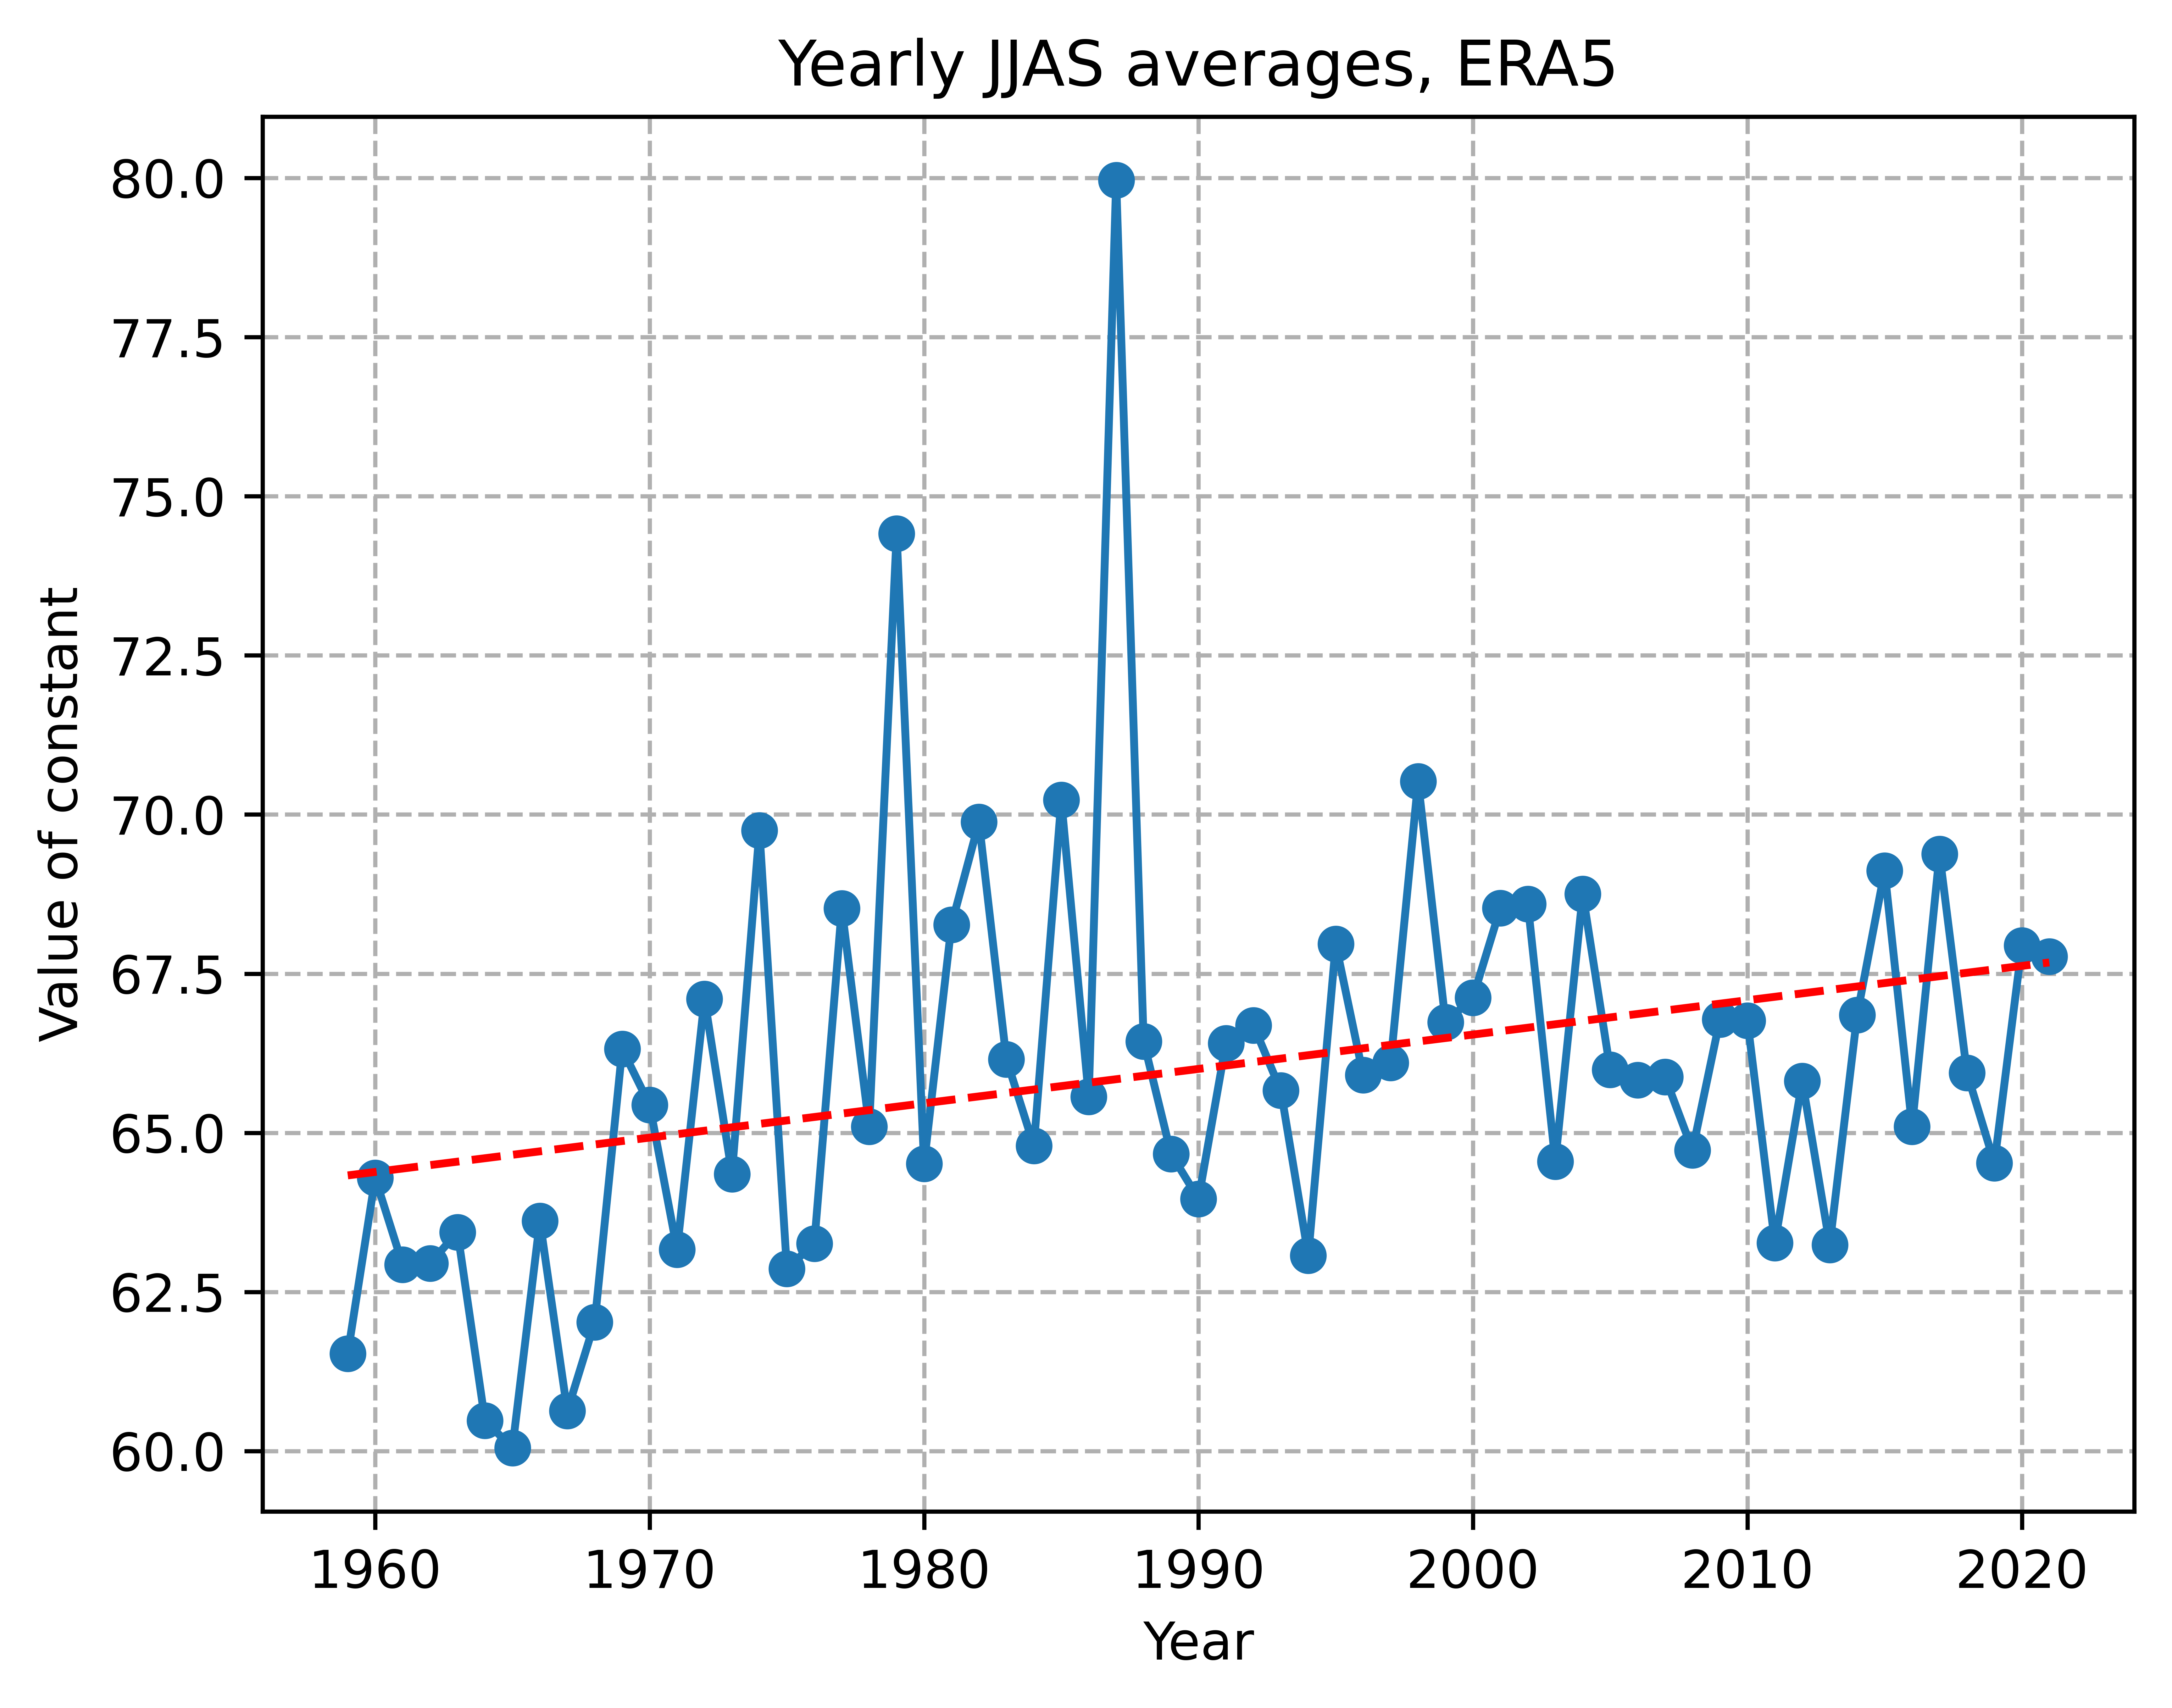

In [6]:
#Calculating constants by year for ERA5
def func(p, pwat, qnet):
    return ((qnet+p)*pwat)/p
out = func(np.array(P1), np.array(Pwat1), np.array(Qdiv1))

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
x = np.array(X).reshape(-1, 1)
y = np.array(out).reshape(-1, 1)
regr.fit(x, y)
y_pred = regr.predict(x)

plt.plot(X, out, marker='o')
plt.plot(X, y_pred, c='r', linestyle='--')
#plt.xticks(X, X, rotation = 90)
plt.ylabel('Value of constant')
plt.xlabel('Year')
plt.title('Yearly JJAS averages, ERA5')
#plt.title('Yearly July, August averages, ERA5')
plt.grid(linestyle='--')
#plt.figtext(0.6, 0.7, 'c = Pwat*(Qdiv/ (P-E))+1')
#plt.title('Month: September')

In [20]:
new=[]
decp=[]
decpwat=[]
for i in range(0, 60,10):
    new.append(np.average(out[i:i+10]))
    decp.append(np.average(P1[i:i+10]))
    decpwat.append(np.average(Pwat1[i:i+10]))

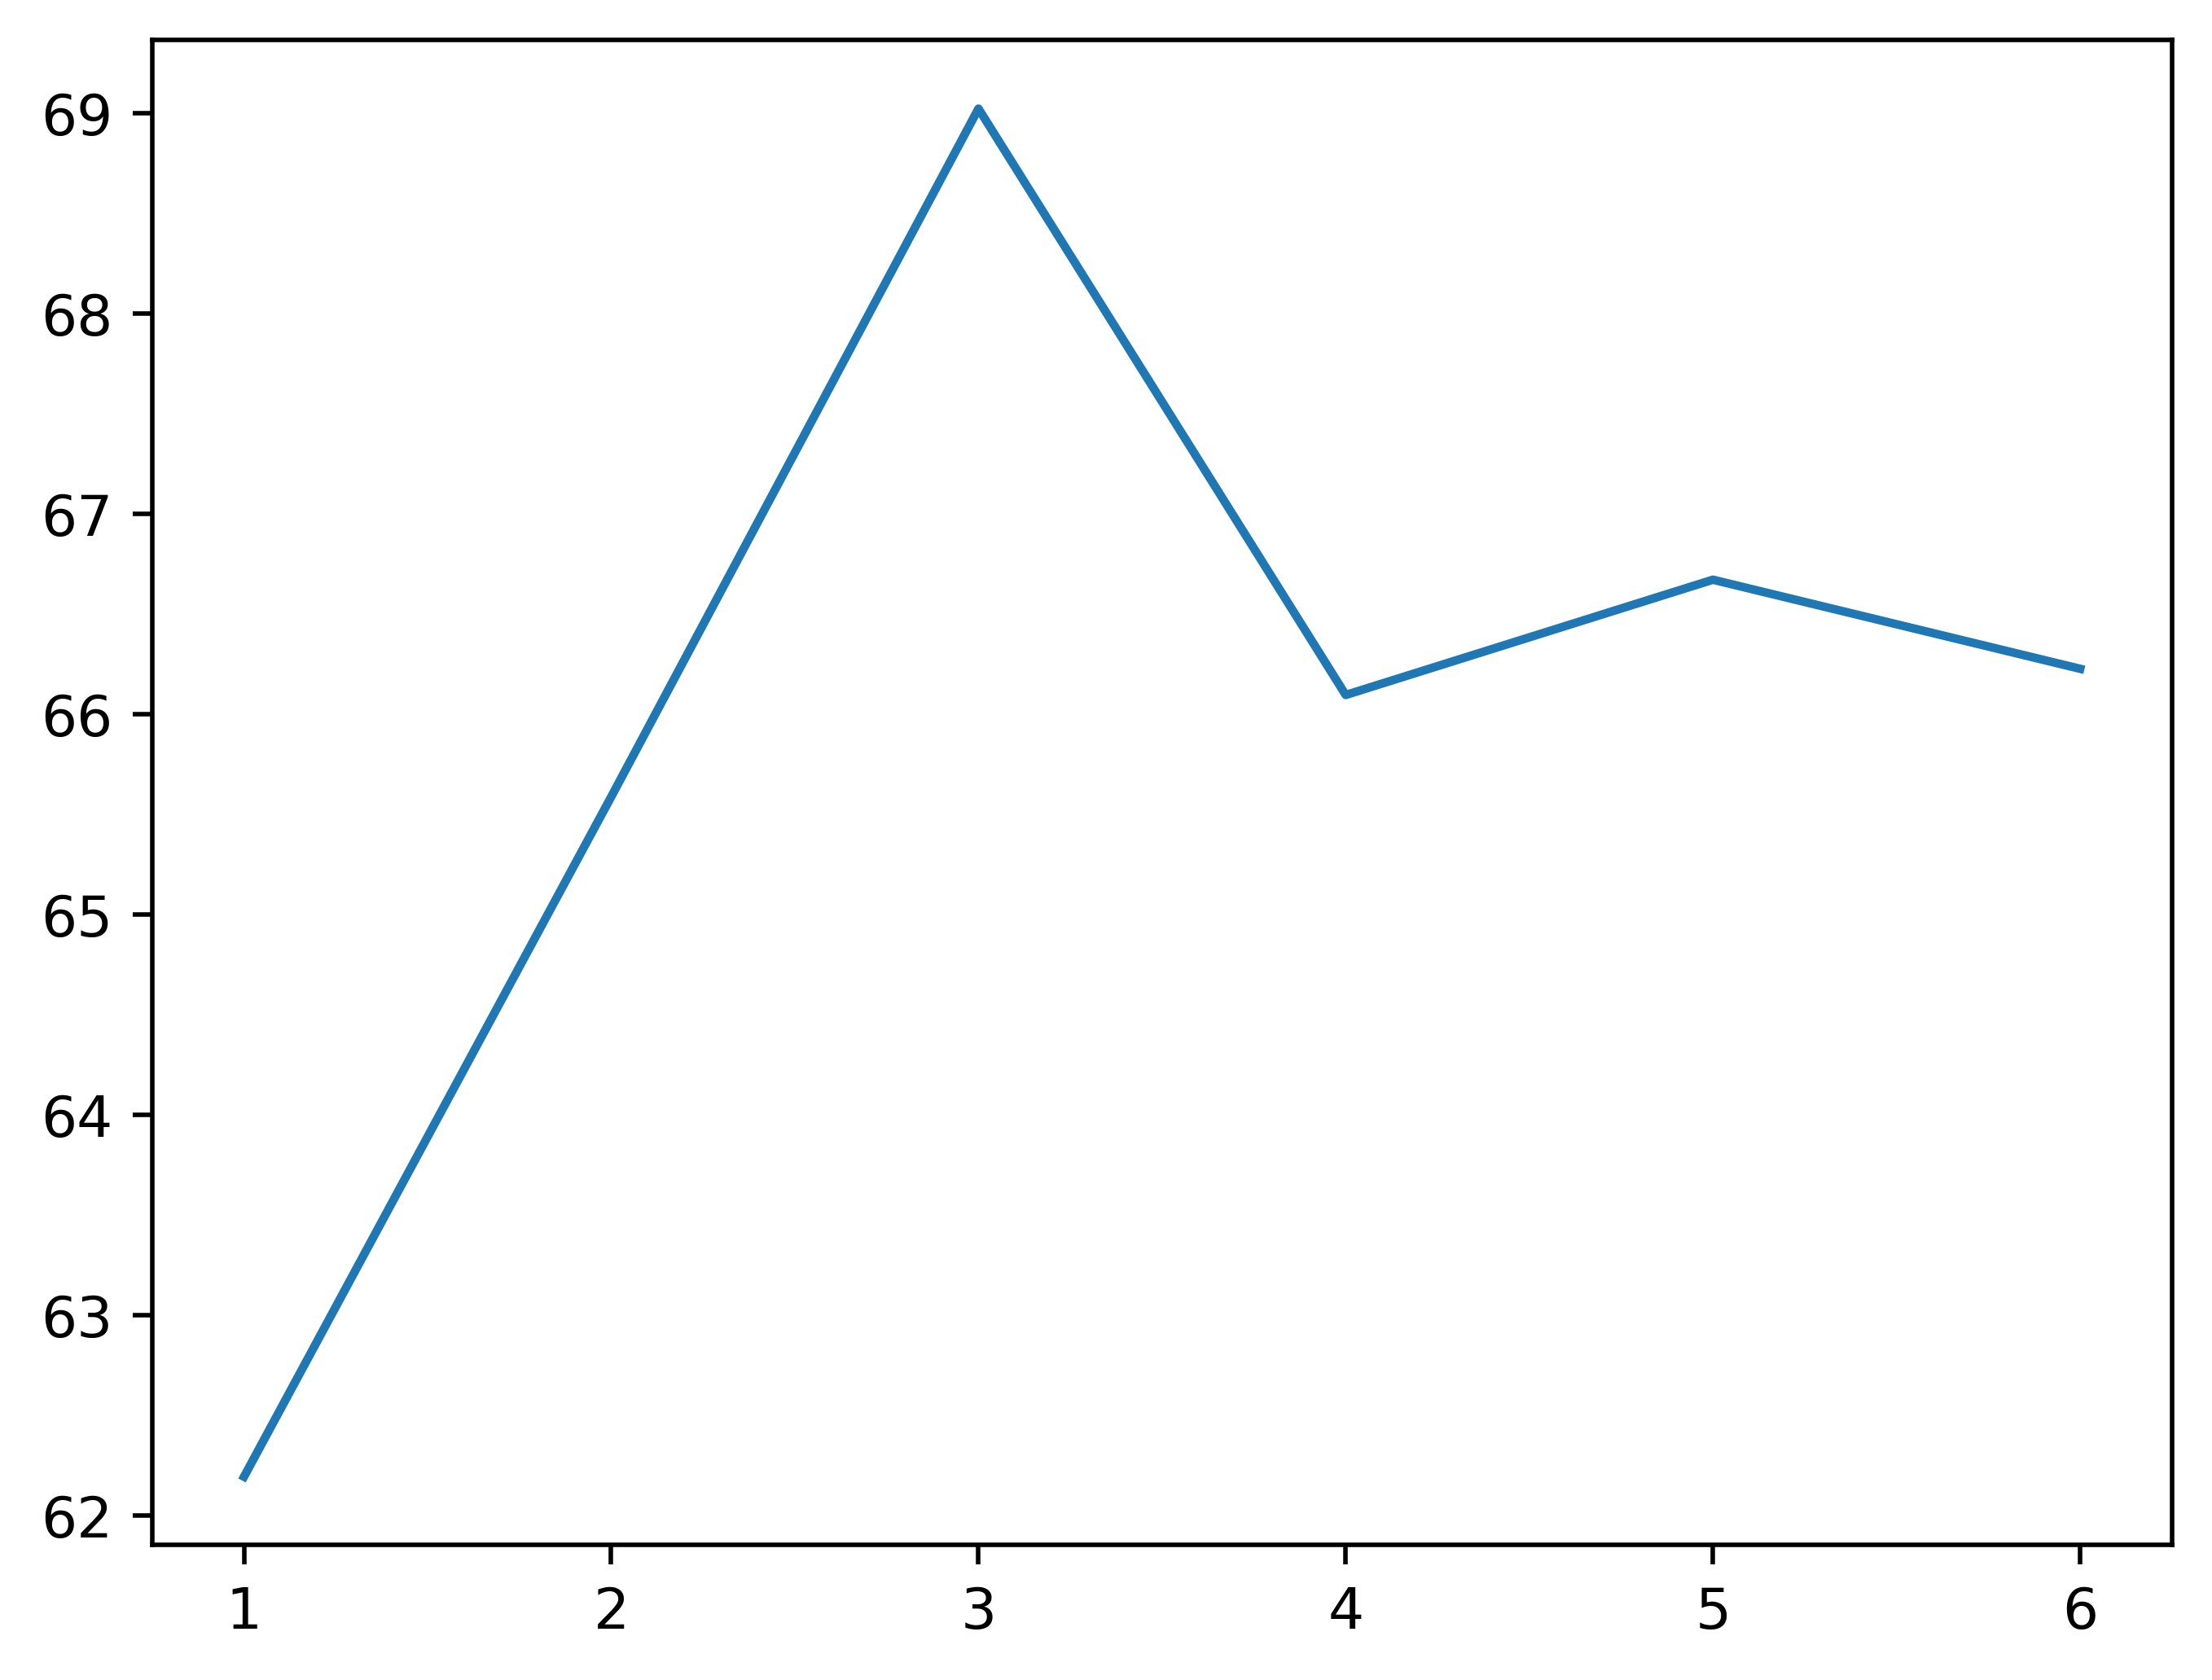

In [18]:
X = np.linspace(1, 6, 6)
plt.plot(X, new)

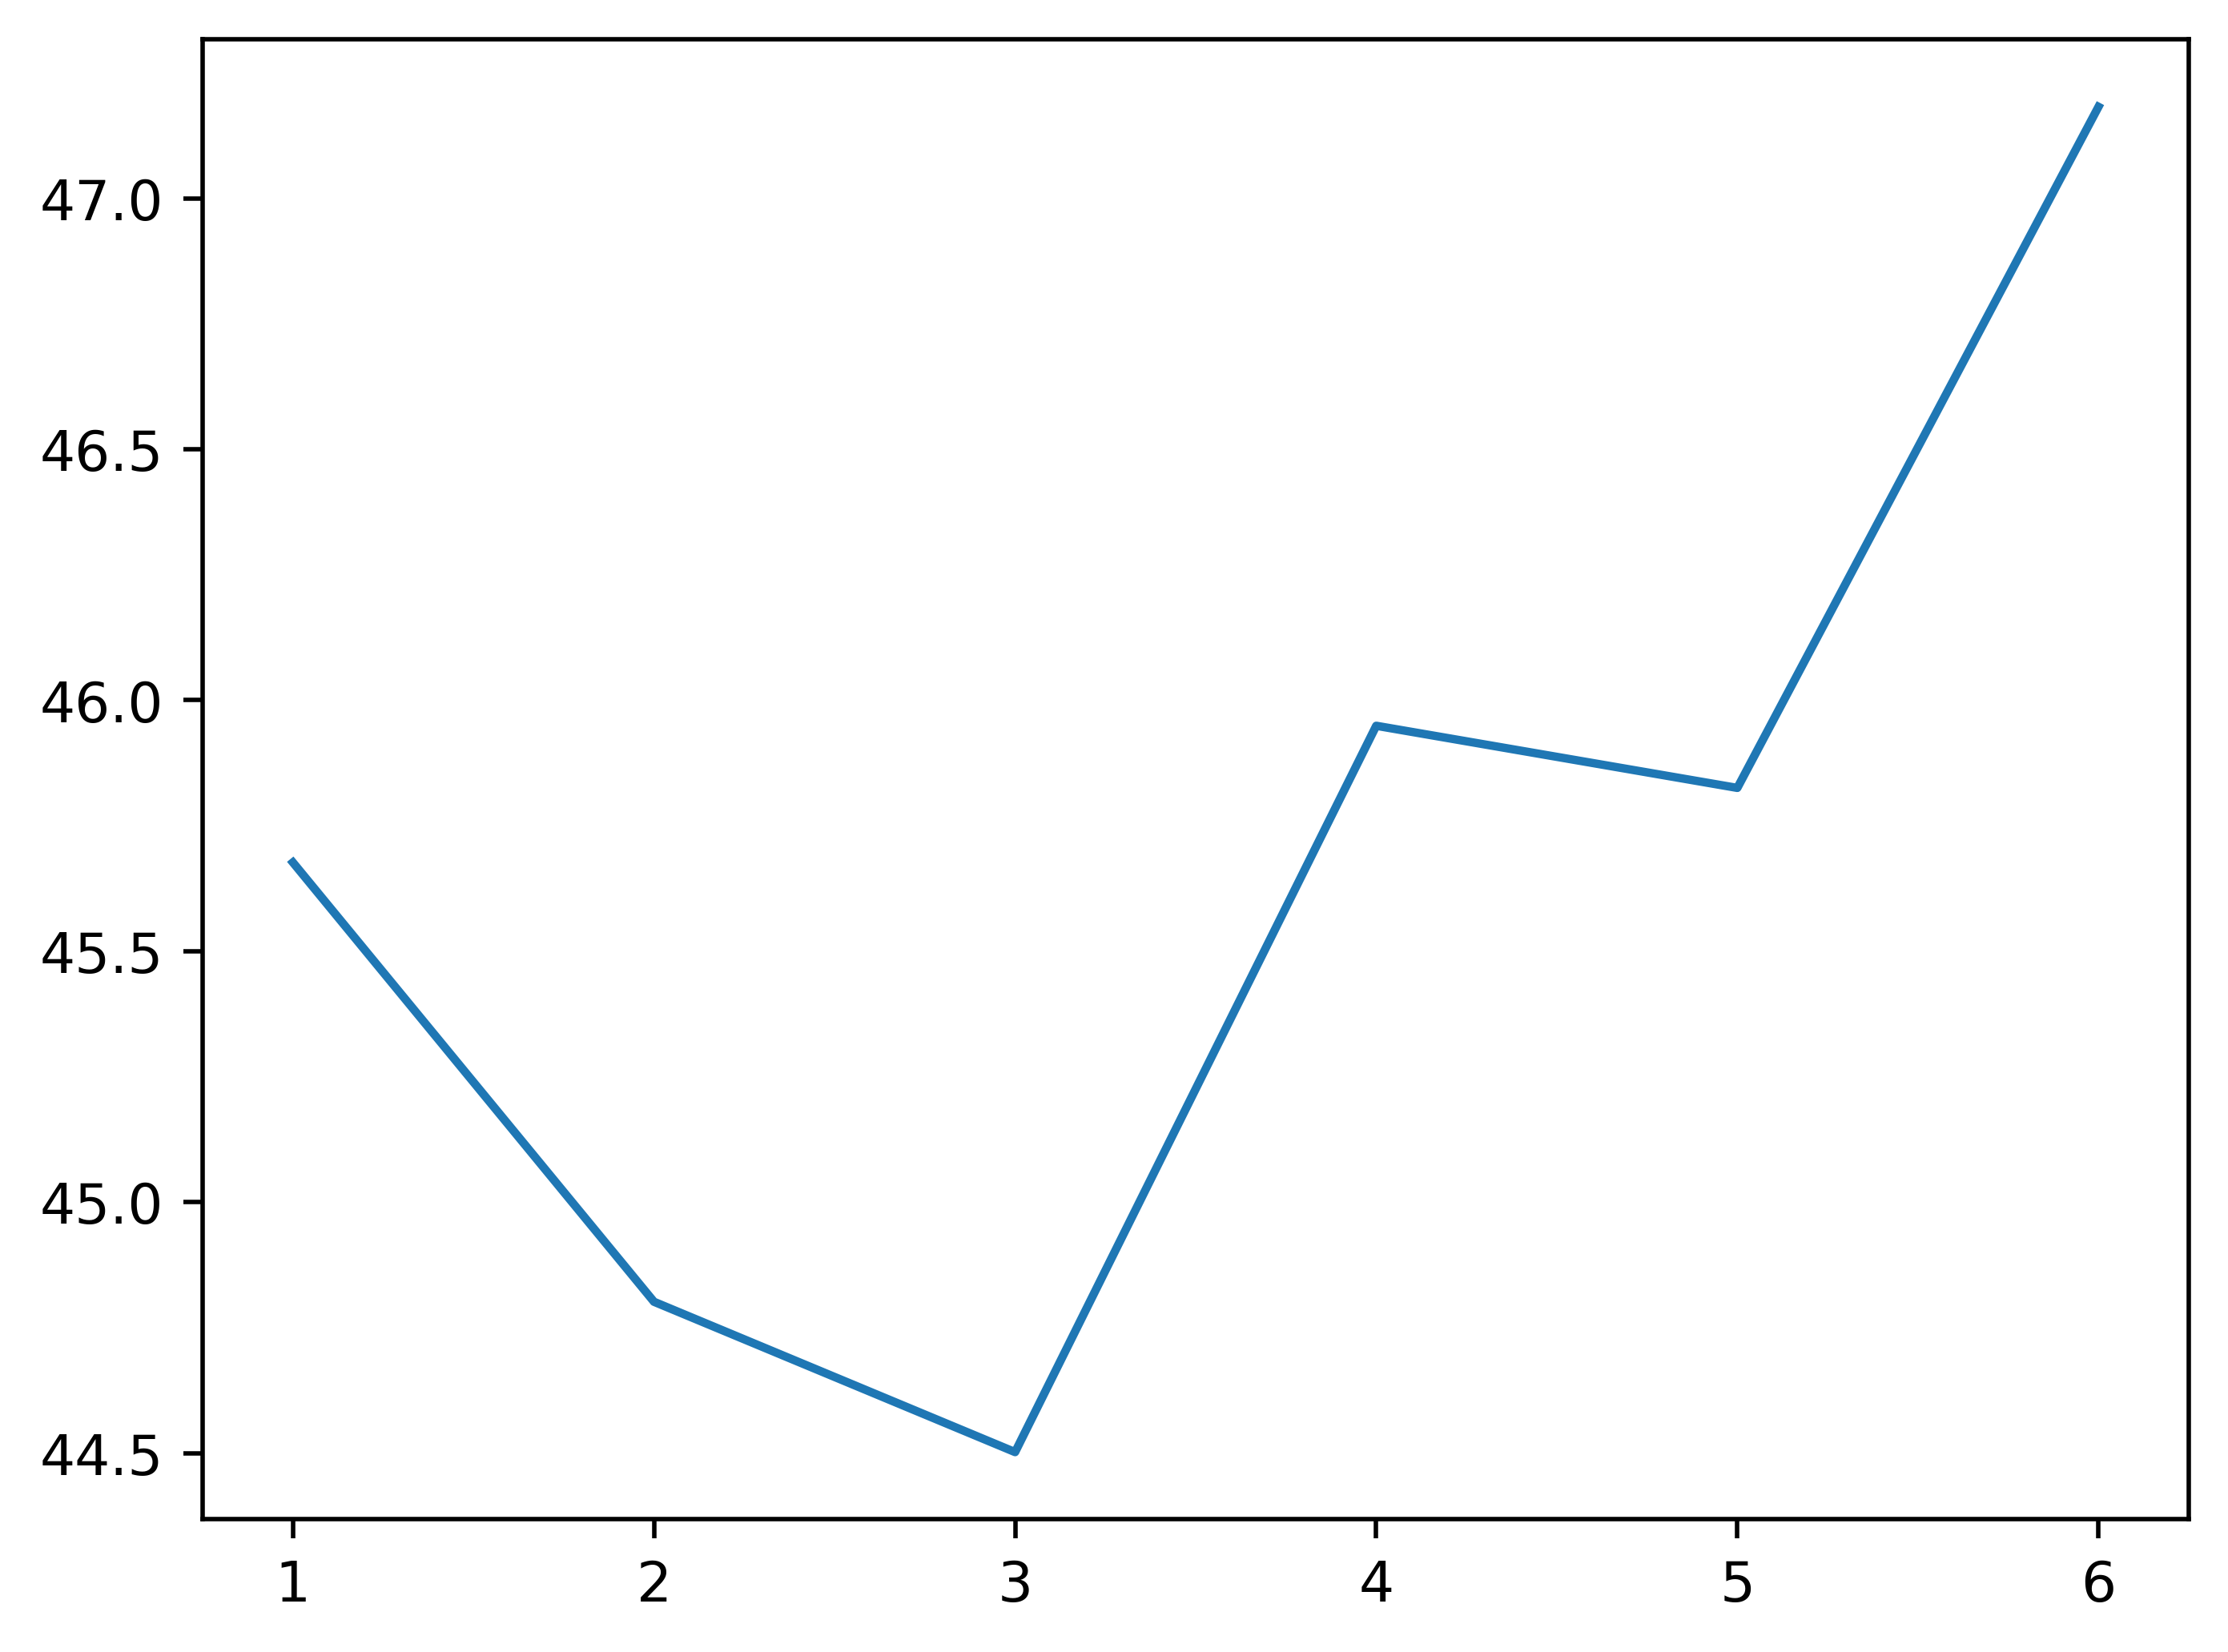

In [24]:
plt.plot(X, decpwat)

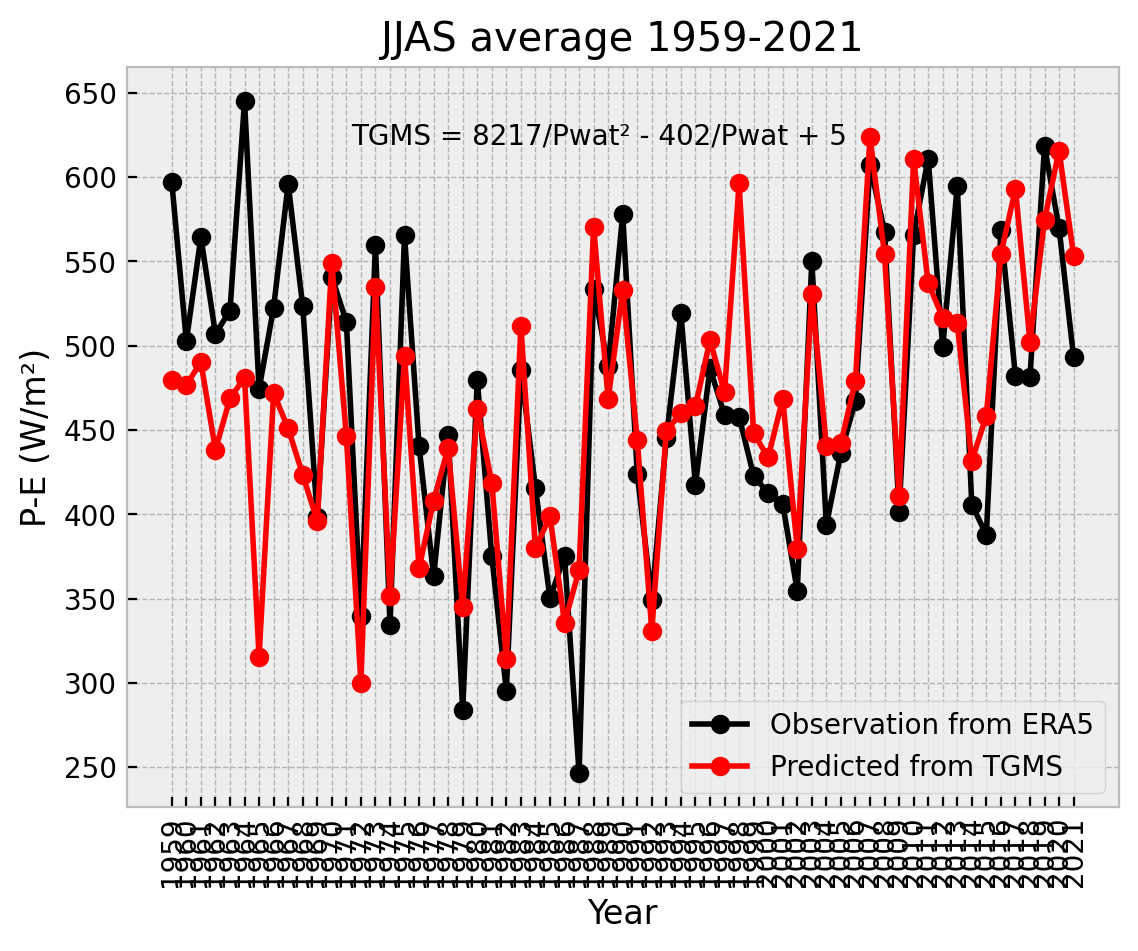

61.538594149057246


Text(0.5, 1.0, 'JJAS average from ERA5')

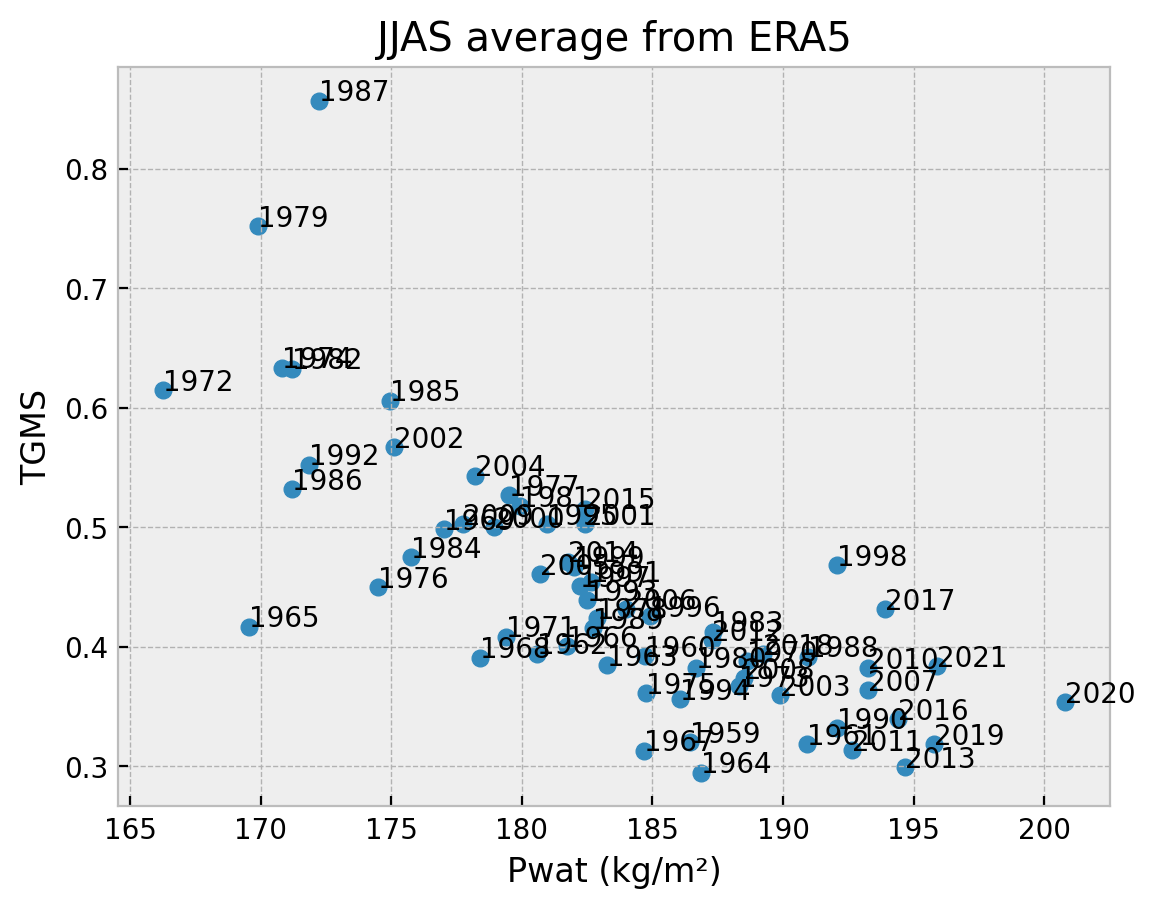

In [18]:
y_line1 = objective(np.array(x1), a1, b1, c1) #These are calculated TGMS values
Pcal = []
for i in range(len(P1)):
	Pcal.append(Qdiv1[i]/y_line1[i])

X1 = np.linspace(1959, 2014, 56, dtype='int')

def f(X, c1, c2):
	x1,y1 = X
	return (x1*y1)/(c1-c2*y1)
	
p0 = 80, 1
X1=Qdiv1
Y1=Pwat1
Z1=P1
popt1, pcov1 = opt.curve_fit(f, (X1, Y1), Z1, p0)

c1, c2= popt1

pred1 = np.array([])
for i in range(len(P1)):
	pred1 = np.append(pred1, (X1[i]*Y1[i])/(c1-c2*Y1[i]))

plt.plot(X, P1, color='black', label = 'Observation from ERA5', marker='o')
plt.plot(X, Pcal, color='r', label="Predicted from TGMS", marker='o')
plt.ylabel('P-E (W/m\u00b2)')
plt.xlabel('Year')
plt.figtext(0.3, 0.8, 'TGMS = 8217/Pwat\u00b2 - 402/Pwat + 5')
plt.legend()
plt.xticks(X, X)
plt.xticks(rotation=90)
plt.title('JJAS average 1959-2021')
plt.show()

sum2 = 0
for i in range(len(P1)):
	sum2 = sum2 + (Pcal[i]-P1[i])**2

print(math.sqrt(sum2/len(P1)))

plt.scatter(Pwat1, TGMS1)

for i in range(len(Pwat1)):
    plt.annotate(X[i], (Pwat1[i], TGMS1[i]))
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('TGMS')
plt.title('JJAS average from ERA5')

In [22]:
TGMSerror = y_line1-np.array(TGMS1)
Perror = np.array(P1)-np.array(Pcal)

plt.scatter(TGMSerror, Perror, c='r')
for i in range(len(Pwat1)):
    plt.annotate(X[i], (TGMSerror[i], Perror[i]))
plt.xlabel('Error in TGMS')
plt.ylabel('Error in P-E (W/m\u00b2)')
plt.show()

print(np.corrcoef(TGMSerror, Perror))

ValueError: operands could not be broadcast together with shapes (100,) (63,) 

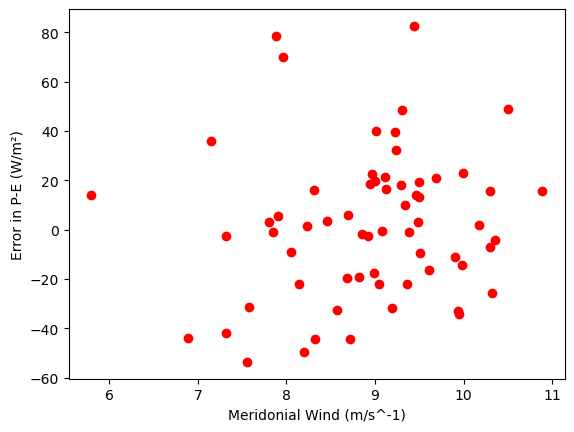

[-2.36373488e+03  6.10923592e+04 -8.29227747e-03 -7.51706936e-03
  2.31435631e+01]


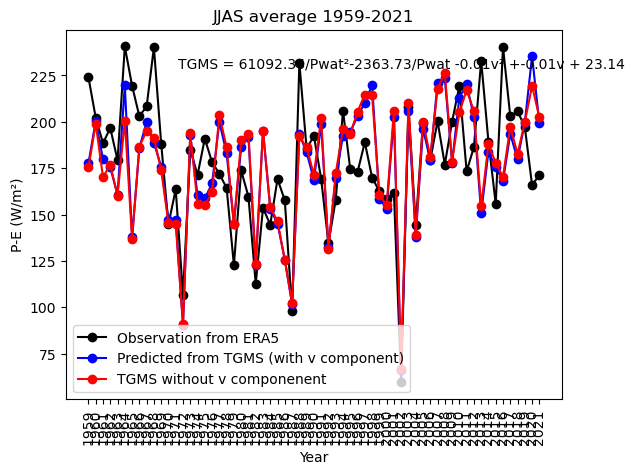

29.594848353615266
[[1.         0.12892194]
 [0.12892194 1.        ]]


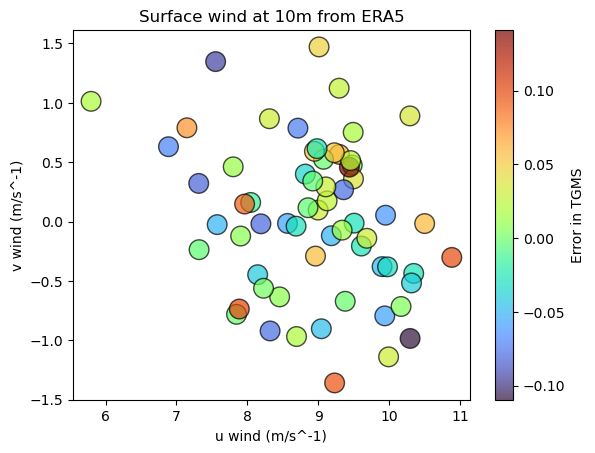

In [12]:


plt.scatter(u, Perror, c='r')
#plt.xlabel('Zonal Wind (m/s^-1)')
plt.xlabel('Meridonial Wind (m/s^-1)')
plt.ylabel('Error in P-E (W/m\u00b2)')
plt.show()



def func(X, a, b, c, d, e):
	x1,y1 = X
	return a * x1 + b * x1**2 + c * y1 + d * y1**2 + e

p0 = -400, 8000, 20, -20, 1
#p0 = 1, 1, 1, 1, 1
X1=rec1
#Y1=u
Y1=v
Z1=TGMS1
popt1, pcov1 = opt.curve_fit(func, (X1, Y1), Z1, p0)

print(popt1)

a, b, c, d, e = popt1

y_line1 = func((np.array(X1),np.array(Y1)), a, b, c, d, e)
Pnew = []
for i in range(len(P1)):
	Pnew.append(Qdiv1[i]/y_line1[i])


plt.plot(X, P1, color='black', label = 'Observation from ERA5', marker='o')
plt.plot(X, Pnew, color='b', label="Predicted from TGMS (with v component)", marker='o')
plt.plot(X, Pcal, label="TGMS without v componenent", c='r', marker='o')
plt.figtext(0.3, 0.8, 'TGMS = ' + "%0.2f" % b + '/Pwat\u00b2' + 
"%0.2f" % a + '/Pwat ' + "%0.2f" % d + 'v\u00b2 +' + "%0.2f" % c + 'v + ' + "%0.2f" % e)
plt.ylabel('P-E (W/m\u00b2)')
plt.xlabel('Year')
plt.legend()
plt.xticks(X, X)
plt.xticks(rotation=90)
plt.title('JJAS average 1959-2021')
plt.show()


sum2 = 0
for i in range(len(P1)):
	sum2 = sum2 + (Pnew[i]-P1[i])**2

print(math.sqrt(sum2/len(P1)))
print(np.corrcoef(u, Perror))


x,y = u,v
z = TGMSerror

sc = plt.scatter(x,y,linewidths=1,alpha=.7,edgecolor='k',s = 200,c=z,cmap='turbo')
plt.xlabel('u wind (m/s^-1)')
plt.ylabel('v wind (m/s^-1)')
plt.title('Surface wind at 10m from ERA5')
clb = plt.colorbar(sc)
clb.ax.set_ylabel('Error in TGMS')
plt.show()
